In [1]:
import pandas as pd
import numpy as np
import sklearn
from xgboost import XGBClassifier
import xgboost
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle
from sklearn.utils import shuffle
import json
import os
from xgboost import XGBClassifier
from matplotlib import pyplot
import math

In [2]:
#Don't use datetime, Don't use categorical features, xgboost doesn't do those, first one hot encode
featuresToUse = ['visitor_hist_starrating', 'visitor_hist_adr_usd',
       'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'comp1_rate', 'comp1_inv',
                 'mean_prop_starrating',
       'mean_prop_review_score', 'mean_prop_brand_bool',
       'mean_prop_location_score1', 'mean_prop_location_score2',
       'mean_prop_log_historical_price','cluster__0','cluster__1','cluster__2','cluster__3','cluster__4','cluster__5','diff_distance_orig']
labelToPredict = 'booking_bool'
neededVars = ['srch_id','click_bool']
nameOfModel = "models/9mayClicking500"

In [2]:
#Don't use datetime, Don't use categorical features, xgboost doesn't do those, first one hot encode
featuresToUse = ['visitor_hist_starrating', 'visitor_hist_adr_usd',
       'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'comp1_rate', 'comp1_inv',
       'diff_distance_orig','diff_price_usd']
labelToPredict = 'click_bool'
neededVars = ['srch_id','booking_bool']
nameOfModel = "models/10mayClicking500"

In [14]:
df = pd.read_csv('../data/80PercentTrainWithMean.csv', delimiter=",",usecols=featuresToUse+[labelToPredict]+neededVars)
dfNeeded= df[neededVars+[labelToPredict]]
Y = df[labelToPredict]
df.drop(neededVars+[labelToPredict],axis=1,inplace=True)

Lets train it on clicking

In [15]:
# construct xgboost.DMatrix from numpy array, treat -999.0 as missing value
#xgmat = xgboost.DMatrix( df, label=y_train)
xgmat = xgboost.DMatrix( df, label=Y)
# setup parameters for xgboost
param = {}
# use logistic regression loss, use raw prediction before logistic transformation
# since we only need the rank
param['objective'] = 'reg:logistic'
# scale weight of positive examples
param['scale_pos_weight'] = sum(Y==0)/sum(Y==1)
param['eta'] = 0.1
param['max_depth'] = 6
param['eval_metric'] = 'auc'
param['silent'] = 0
#param['colsample_bytree'] = 0.8


# you can directly throw param in, though we want to watch multiple metrics here
plst = list(param.items())

watchlist = [ (xgmat,'train') ]

num_round = 1000
print ('loading data end, start to boost trees')
bst = xgboost.train( plst, xgmat, num_round, watchlist ,early_stopping_rounds=5);
# save out model
bst.save_model(nameOfModel+".model")

print ('finish training')


C:\Users\Rens\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Rens\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


loading data end, start to boost trees
[0]	train-auc:0.662401
Will train until train-auc hasn't improved in 5 rounds.
[1]	train-auc:0.666177
[2]	train-auc:0.668057
[3]	train-auc:0.669575
[4]	train-auc:0.670765
[5]	train-auc:0.671458
[6]	train-auc:0.67224
[7]	train-auc:0.673214
[8]	train-auc:0.673792
[9]	train-auc:0.674651
[10]	train-auc:0.675166
[11]	train-auc:0.675431
[12]	train-auc:0.675982
[13]	train-auc:0.676567
[14]	train-auc:0.677257
[15]	train-auc:0.677702
[16]	train-auc:0.678468
[17]	train-auc:0.678827
[18]	train-auc:0.679507
[19]	train-auc:0.680027
[20]	train-auc:0.680639
[21]	train-auc:0.681048
[22]	train-auc:0.681478
[23]	train-auc:0.681921
[24]	train-auc:0.682566
[25]	train-auc:0.68293
[26]	train-auc:0.683598
[27]	train-auc:0.684023
[28]	train-auc:0.684495
[29]	train-auc:0.68507
[30]	train-auc:0.685629
[31]	train-auc:0.685959
[32]	train-auc:0.686342
[33]	train-auc:0.686882
[34]	train-auc:0.687348
[35]	train-auc:0.687664
[36]	train-auc:0.688106
[37]	train-auc:0.688346
[38]	t

[330]	train-auc:0.719273
[331]	train-auc:0.719341
[332]	train-auc:0.719489
[333]	train-auc:0.719586
[334]	train-auc:0.719664
[335]	train-auc:0.71977
[336]	train-auc:0.719807
[337]	train-auc:0.719822
[338]	train-auc:0.719916
[339]	train-auc:0.720033
[340]	train-auc:0.720141
[341]	train-auc:0.720186
[342]	train-auc:0.72026
[343]	train-auc:0.720439
[344]	train-auc:0.72049
[345]	train-auc:0.72059
[346]	train-auc:0.720642
[347]	train-auc:0.720664
[348]	train-auc:0.720682
[349]	train-auc:0.720775
[350]	train-auc:0.720826
[351]	train-auc:0.720865
[352]	train-auc:0.720872
[353]	train-auc:0.72096
[354]	train-auc:0.72106
[355]	train-auc:0.721118
[356]	train-auc:0.721223
[357]	train-auc:0.721302
[358]	train-auc:0.721397
[359]	train-auc:0.721482
[360]	train-auc:0.721568
[361]	train-auc:0.721649
[362]	train-auc:0.721751
[363]	train-auc:0.7218
[364]	train-auc:0.721913
[365]	train-auc:0.721994
[366]	train-auc:0.722049
[367]	train-auc:0.722182
[368]	train-auc:0.722253
[369]	train-auc:0.722264
[370]	tr

[660]	train-auc:0.737593
[661]	train-auc:0.737659
[662]	train-auc:0.737701
[663]	train-auc:0.737717
[664]	train-auc:0.737767
[665]	train-auc:0.737805
[666]	train-auc:0.737818
[667]	train-auc:0.737854
[668]	train-auc:0.737865
[669]	train-auc:0.737928
[670]	train-auc:0.737935
[671]	train-auc:0.737939
[672]	train-auc:0.737947
[673]	train-auc:0.737947
[674]	train-auc:0.738044
[675]	train-auc:0.738111
[676]	train-auc:0.738175
[677]	train-auc:0.738263
[678]	train-auc:0.738347
[679]	train-auc:0.738396
[680]	train-auc:0.738485
[681]	train-auc:0.738545
[682]	train-auc:0.738598
[683]	train-auc:0.738643
[684]	train-auc:0.738659
[685]	train-auc:0.738689
[686]	train-auc:0.738705
[687]	train-auc:0.738743
[688]	train-auc:0.738749
[689]	train-auc:0.738786
[690]	train-auc:0.738864
[691]	train-auc:0.738965
[692]	train-auc:0.739019
[693]	train-auc:0.739109
[694]	train-auc:0.739224
[695]	train-auc:0.739294
[696]	train-auc:0.739347
[697]	train-auc:0.739352
[698]	train-auc:0.739429
[699]	train-auc:0.739518


[990]	train-auc:0.751887
[991]	train-auc:0.751953
[992]	train-auc:0.752019
[993]	train-auc:0.752095
[994]	train-auc:0.752156
[995]	train-auc:0.752203
[996]	train-auc:0.752226
[997]	train-auc:0.752283
[998]	train-auc:0.752396
[999]	train-auc:0.752449
finish training


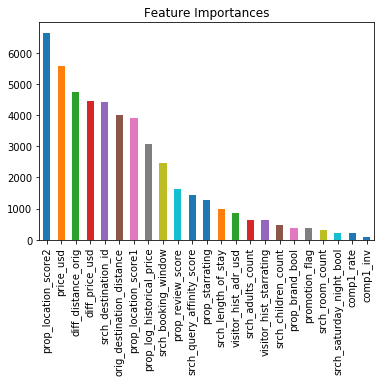

In [16]:
feat_imp = pd.Series(bst.get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')


In [17]:
df = pd.read_csv('../data/20PercentTestWithMean.csv', delimiter=",",usecols=featuresToUse+[labelToPredict]+neededVars)
dfNeeded= df[neededVars+[labelToPredict]]
Y = df[labelToPredict]
df.drop(neededVars+[labelToPredict],axis=1,inplace=True)

In [18]:
xgmat_test = xgboost.DMatrix( df, label=Y)
y_pred = bst.predict(xgmat_test)

C:\Users\Rens\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Rens\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [19]:
predictions = [round(value) for value in y_pred]
df = pd.concat([df,dfNeeded],axis=1)
df['y_pred'] = y_pred

In [8]:
def getLog(x):
    return math.log(x+1,2)
def getScore(df):
    df['rank_srch_id'] = df.groupby('srch_id').cumcount().add(1)
    
    df['gain'] = 5*df['booking_bool']
    df['gain'] = np.where(df['gain'] == 0, df['click_bool'], df['gain'])
    df['log_rank'] = df['rank_srch_id'].apply(getLog)
    
    df['g/rank'] = df['gain']/df['log_rank']
    gi_sum = df['g/rank'].sum()

    df['gain_sorted'] = list(df[['srch_id', 'booking_bool', 'click_bool', 'gain']].sort_values(by = ['srch_id','booking_bool','click_bool'], ascending = [True, False, False])['gain'])
    df['g/rank_sorted'] = df['gain_sorted']/df['log_rank']
    gi_sorted_sum = df['g/rank_sorted'].sum()
    
    score = gi_sum/gi_sorted_sum

    return score, gi_sum, gi_sorted_sum

In [21]:
score, gi_sum, gi_sorted_sum = getScore(df.sort_values(by=['srch_id', 'y_pred'], ascending = [True, False]).reset_index(drop=True))
print(score)

# evaluate predictions
accuracy = accuracy_score(df['click_bool'], predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



0.7492824969490127
Accuracy: 69.26%


In [22]:
f=open("scores.txt", "a+")
f.write("Score: "+str(score)+"\n")
f.write("Label to predict: "+str(labelToPredict)+"\n")
f.write("Features used:\n")
f.write(str(list(featuresToUse)) +"\n")
f.write("Parameters xgboost:\n")
f.write(str(json.dumps(param))+"\n")
f.write("Number of rounds:\n"+str(num_round)+"\n")
f.close()

In [23]:
os.rename(nameOfModel+".model",nameOfModel+str(int(score*100))+".model")
newNameOfModel = nameOfModel+str(int(score*100))

Lets combine the models

In [3]:
clickingModel = xgboost.Booster()
clickingModel.load_model('models/10mayClicking50074.model')
bookingModel = xgboost.Booster()
bookingModel.load_model("models/9mayBooking74.model")

In [4]:
df = pd.read_csv('../data/20PercentTestWithMean.csv', delimiter=",",usecols=featuresToUse+[labelToPredict]+neededVars)
dfNeeded= df[neededVars+[labelToPredict]]
df.drop(neededVars+[labelToPredict],axis=1,inplace=True)

In [5]:
xgmat_test = xgboost.DMatrix( df)
y_pred_clicking = clickingModel.predict(xgmat_test)
y_pred_booking = bookingModel.predict(xgmat_test)

In [6]:
df = pd.concat([df,dfNeeded],axis=1)
df['y_pred_clicking'] = y_pred_clicking
df['y_pred_booking'] = y_pred_booking
df['combined'] = y_pred_booking+y_pred_clicking

In [9]:
score_apart, gi_sum, gi_sorted_sum = getScore(df.sort_values(by=['srch_id', 'y_pred_booking', 'y_pred_clicking'], ascending = [True, False,False]).reset_index(drop=True))
score_combined, gi_sum, gi_sorted_sum = getScore(df.sort_values(by=['srch_id', 'combined'], ascending = [True, False]).reset_index(drop=True))
print("Sort first on booking and then on clicking: "+str(score_apart))
print("Combine then sort: "+str(score_combined))

Sort first on booking and then on clicking: 0.7482338410691464
Combine then sort: 0.7518651972072667


Evaluation

In [3]:
dfTest = pd.read_csv("../data/testWithMean.csv")

In [4]:
clickingModel = xgboost.Booster()
clickingModel.load_model('models/10mayClicking50074.model')
bookingModel = xgboost.Booster()
bookingModel.load_model("models/9mayBooking74.model")

In [5]:
xgmat_test_submission = xgboost.DMatrix(dfTest[featuresToUse])
y_pred_clicking = clickingModel.predict(xgmat_test_submission)
y_pred_booking = bookingModel.predict(xgmat_test_submission)
dfTest['predictedPos'] = y_pred_clicking+y_pred_booking
dfTest = dfTest.sort_values(['srch_id','predictedPos'],ascending=[True, False])
dfSubmission = dfTest[['srch_id','prop_id']]
dfSubmission.to_csv("submissionTest9may2.csv",index=False)